# **Experiment 2: Feature Engineering**

## ***Objectives for this Notebook***
* Showcase feature engineering, dimensionality reduction techniques, Pipeline, and different ways to evaluate your models.

Machine learning models thrive on good data. But raw data often comes messy and unrefined, holding hidden gems amidst irrelevant clutter. This is where feature engineering comes in to offer valuable insights and enhance our datasets for better model performance.

**Feature Engineering** is the process of transforming raw data into features that are suitable for training and deploying machine learning models. Simply, it's about:
* Selecting the right features: Choosing the most relevant features that hold predictive power for your target variable. Think carefully, irrelevant features can mislead your model!
* Transforming features: Scaling, normalizing, or encoding categorical data to ensure all features play fair in the model's eyes. No one wants features dominating the competition due to unfair advantages!
* **Creating new features: Combining existing features or extracting hidden patterns to unlock deeper insights. New features can be like secret weapons for your model!**

For this project, we are going to focus on creating new features using algorithms that are also used for another technique called dimensionality reduction.

**Dimensionality reduction** is a technique used in machine learning to reduce the number of features in a dataset while preserving its essential information. The goal is to simplify the data and improve computational efficiency, mitigate the curse of dimensionality, and enhance the performance of machine learning models. Because we're not really working with a large dataset, we don't need to implement dimensionality reduction in this notebook. But it's important to know that our gameplan for creating new features is to use dimensionality reduction techniques such as NMF, LDA, and PCA, to extract latent features, and then appending those latent features to our current feature space. The process of capturing of new features is also called **feature extraction**.

**Algorithms**:
* *Non-Negative Matrix Factorization (NMF)*: NMF is a factorization technique that decomposes a matrix into two non-negative matrices. It is particularly useful for non-negative data, such as images or text, and is often applied in topic modeling and image processing.
* *Latent Dirichlet Allocation (LDA)*: LDA is a probabilistic generative model used for topic modeling. It assumes that documents are mixtures of topics and that each word's presence is attributable to one of the document's topics. LDA helps discover the underlying topics in a collection of documents.
* *Principal Componentn Analysis (PCA)* finds the simplest "directions" in your data that capture the most variation, letting you see the big picture with fewer dimensions.


## **1.) Loading the dataset and setting parameters**

In [116]:
import pandas as pd
import numpy as np
import os

from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.ensemble import RandomForestClassifier
from sklearn.decomposition import NMF, LatentDirichletAllocation, PCA # algorithms to extract latent features
from sklearn.model_selection import GridSearchCV, StratifiedKFold
from sklearn.metrics import balanced_accuracy_score, make_scorer
from sklearn.pipeline import Pipeline
from sklearn.model_selection import train_test_split
from sklearn.metrics import make_scorer, balanced_accuracy_score

import random
from sklearn.utils import check_random_state

seed_value = 42
# Set Python seed
random.seed(seed_value)

# Set NumPy seed
np.random.seed(seed_value)

# Set scikit-learn seed
sklearn_random_state = check_random_state(seed_value)

In [2]:
microbiome_df = pd.read_csv("./dataset/microbiome_preprocessed_files/microbiome_merged_dfs.csv")
microbiome_df

,name,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,...,Hungatella,Pseudopropionibacterium,Peptoanaerobacter,Emergencia,Prevotellamassilia,Criibacterium,Fournierella,Negativibacillus,Duodenibacillus,label
0,TCGA-CG-5720-01A,0.0,0.000000,0.000000,0.895050,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD
1,TCGA-CN-4741-01A,0.0,0.000000,0.010470,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
2,TCGA-BR-6801-01A,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD
3,TCGA-IG-A3I8-01A,0.0,0.000000,0.000000,0.067717,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,ESCA
4,TCGA-L5-A4OT-01A,0.0,0.000000,0.012202,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,ESCA
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,TCGA-CG-5719-01A,0.0,0.000000,0.000000,0.106557,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD
508,TCGA-CQ-5329-01A,0.0,0.175564,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.136613,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
509,TCGA-CQ-7068-01A,0.0,0.335060,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,...,0.0,0.0,0.011534,0.0,0.0,0.0,0.0,0.0,0.0,HNSC
510,TCGA-CG-4455-01A,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.014781,0.0,0.0,...,0.0,0.0,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,STAD


In [10]:
classes = ["HNSC", "STAD", "COAD", "ESCA", "READ"]

## **2.) Feature Engineering with Cross Validation and Hyperparameter Grid Search**

Remember we talked about feature engineering is about creating new features? Before we can proceed with the classification, we need to create those new latent features.

**Latent features** are hidden, underlying characteristics of your data revealed through dimensionality reduction techniques like NMF, LDA, and PCA. They capture significant relationships between your original features but aren't directly observable, acting as compressed representations of the data's essence.

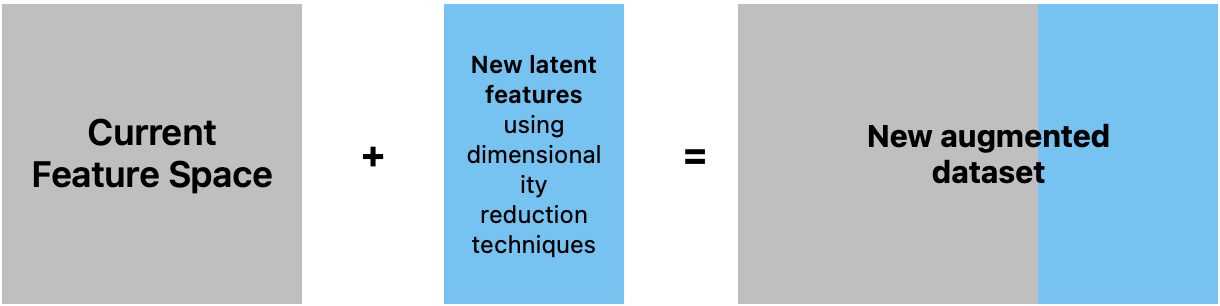

This means we need to update our data loader so that it incorporates a way to extract these new latent features using dimensionality reduction techniques (NMF, LDA, PCA), and appends these new latent features to our current feature space.

When we implement NMF, LDA, and PCA, we will use GridSearchCV to help us determine the best hyperparameters. All of these algorithms accept an `n_component` argument, which means "Number of components to keep." Think of it as how many data points you want these algorithms to extract for you when you run them through the dataset.

Here's the gameplan of how we're going to update the Data Loader.

1. First, we will need the best hyperparmeters from the first experiment. We will use the best hyperparameters for the Random Forest classifier so we don't need to repeat those steps.

In [154]:
exp1_best_hyperparam_report = pd.read_csv("./dataset/microbiome_preprocessed_files/exp1_v2_best_hyperparam.csv")
exp1_best_hyperparam_report

,label,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_score,mean_train_score,mean_validation_score
0,HNSC,gini,21,61,1,42,51,0.792271,0.940221,0.845135
1,STAD,gini,11,101,1,2,101,0.772232,0.974606,0.833919
2,COAD,gini,11,61,1,42,101,0.921960,0.952209,0.924366
3,ESCA,entropy,11,81,1,22,1,0.526144,0.787640,0.716555
4,READ,gini,11,61,1,2,1,0.500000,0.827371,0.677520


In [165]:
classes

['HNSC', 'STAD', 'COAD', 'ESCA', 'READ']

2. Second, we need to create the hyperparameter grids. Remember we have different best hyperparameters among the different cancer types. For examples, HNSC's best hyperparameter for criterion is gini, while ESCA is entropy. The code below is to create different hyperparameter grids that incorporates the best hyperparameters from experiment 1 + the new hyperapameter grids for the NMF, LDA, and PCA algorithms.

In [183]:
# Hyperparameters for the dimensionality reduction techniques. These ranges came from the paper.
nmf_pca_param_grid = {
    "transformer__n_components": list(range(4,65)) # In paper, features 4 to 64
}

lda_param_grid = {
    "transformer__n_components": list(range(1, len(classes))) # In paper, features 1 to length of class-1
}


# Function to create hyperparameter grids, remember we used the best hyperparameters for the rf classifier from experiment 1.

def create_hyperparameter_grids(report_df, additional_param=None):
    """
    report_df (Dataframe): The report from experiment one/ output of the best_hyperparameter_to_df()
    additional_param (Dict): Defaults to none, any additional hyperpameters to add to the hyperparameter grid.
    """
    
    new_hyperparamter_grid_by_class = {}

    # Read the best hyperparameters from experiment 1
    exclude_cols = ["label", "test_score", "mean_train_score", "mean_validation_score"] # We don't want these columns to be in our future grid parameters
    if report_df is None or report_df.empty:
        raise ValueError("Report DataFrame is required.")

    for c in report_df.index: 
        # Choose a row (class) from the report DataFrame
        selected_class = report_df.index[c]
        # Get the best hyperparameters and remove excluded columns
        exp1_best_hyperparameters = report_df.loc[selected_class].drop(exclude_cols).to_dict()

        exp1_best_hyperparameters = {f"{key}": [value] for key, value in exp1_best_hyperparameters.items()} # The format we want for classifier hyperparameters

        if additional_param != None:
            # Add the additional parameters
            exp1_best_hyperparameters = {f"rf__{key}": value for key, value in exp1_best_hyperparameters.items()} #Adjust prefix of hyperparameters
            combined_param_grid = {**exp1_best_hyperparameters, **additional_param}
            new_hyperparamter_grid_by_class[report_df.loc[selected_class]["label"]] = combined_param_grid
        else:
            new_hyperparamter_grid_by_class[report_df.loc[selected_class]["label"]] = exp1_best_hyperparameters

    return new_hyperparamter_grid_by_class

Let's see this function in action.

In [186]:
combined_param_grid = create_hyperparameter_grids(report_df=exp1_best_hyperparam_report, additional_param=lda_param_grid)
combined_param_grid

{'HNSC': {'rf__criterion': ['gini'],
  'rf__max_depth': [21],
  'rf__max_features': [61],
  'rf__min_samples_leaf': [1],
  'rf__min_samples_split': [42],
  'rf__n_estimators': [51],
  'transformer__n_components': [1, 2, 3, 4]},
 'STAD': {'rf__criterion': ['gini'],
  'rf__max_depth': [11],
  'rf__max_features': [101],
  'rf__min_samples_leaf': [1],
  'rf__min_samples_split': [2],
  'rf__n_estimators': [101],
  'transformer__n_components': [1, 2, 3, 4]},
 'COAD': {'rf__criterion': ['gini'],
  'rf__max_depth': [11],
  'rf__max_features': [61],
  'rf__min_samples_leaf': [1],
  'rf__min_samples_split': [42],
  'rf__n_estimators': [101],
  'transformer__n_components': [1, 2, 3, 4]},
 'ESCA': {'rf__criterion': ['entropy'],
  'rf__max_depth': [11],
  'rf__max_features': [81],
  'rf__min_samples_leaf': [1],
  'rf__min_samples_split': [22],
  'rf__n_estimators': [1],
  'transformer__n_components': [1, 2, 3, 4]},
 'READ': {'rf__criterion': ['gini'],
  'rf__max_depth': [11],
  'rf__max_features': 

You'll notice these prefixes "rf__" and "transformer__" before the hyperparameter names. The prefixes added to hyperparameter
names in GridSearchCV are used to distinguish between different hyperparameters. The prefix is simply the name of the estimator
that the hyperparameter is being tuned for. For example, if we are tuning the hyperparameters for Random Forest, then the prefix for those hyperparameters will be "rf__", and if we are tuning the hyperparameters for dimensionality reduction techniques (data transformers) then the predix will be "transformers__". These prefixes are abritrary, you can name it however you like using Pipeline.

**Pipeline** chains the data transformation and the classificiation tasks together into a single, powerful workflow. 

**Concept and use:**
* **Chaining transformations and estimators**: You define a list of steps, each consisting of a transformer (e.g., scaling, encoding) and its corresponding parameters. The transformers pre-process the data, while the final estimator (e.g., classifier, regressor) learns from the transformed data.
* **Streamlined workflow**: Instead of calling individual fit and predict methods on each step separately, you simply call them on the Pipeline object, simplifying your code and reducing boilerplate.
* **Joint parameter tunin**g: You can optimize hyperparameters for all components in the pipeline simultaneously through grid search or other methods, ensuring all steps work together seamlessly.

You will see Pipieline in action in the following function.

3. Create a function that will extract the latent features using GridSearchCV, and return those latent features in a dictionary.


In [187]:
def augment_dataset(X,y,report_df,algorithm="NMF"):
    """
    X (Dataframe): features
    y (Dataframe): targets
    hyperparameter (Dataframe): hyperparameter report from experiment 1
    algorithm (str): name of algorithm you want to use
    """

    augmented_datasets_dict = {}
    
    # Create the pipeline object. Here we are chaining the dimensionality reduction step and the classifier step.

    algorithms_dict = {"NMF": NMF(), "LDA": LatentDirichletAllocation(), "PCA": PCA()}
    pipeline = Pipeline([
        ('transformer', algorithms_dict[algorithm]),
        ('rf', RandomForestClassifier(random_state=seed_value))
    ])

    # Create the hyperparameters
    combined_param_grid = create_hyperparameter_grids(report_df, lda_param_grid if algorithm=="LDA" else nmf_pca_param_grid)
 
 
    print(f'Using algorithm {algorithm}:')
    for i in classes:
        print(f"Class {i}")
        cv = StratifiedKFold(n_splits=5, shuffle=True, random_state=seed_value)

        # Create the GridSearchCV object
        grid_search = GridSearchCV(
            estimator=pipeline,
            param_grid=combined_param_grid[i],
            cv=cv,
            n_jobs=-1,  # Use all available processors
        )

        # Perform the grid search
        print("Fitting..")
        grid_search.fit(X, y)

        # Print the best hyperparameters
        print("Best Hyperparameters:", grid_search.best_params_)

        # Get the best model
        best_model = grid_search.best_estimator_

        # LENGTH OF DATASET SHOULD STAY SIMILAR TO ORIGINAL, but length of features should increase by the best n_components

        # Transform the original dataset to get the latent features
        latent_features = best_model.named_steps['transformer'].transform(X)
        print(f"Count of new columns/latent features: {len(latent_features.T)}")

        print(f"Count of columns of original feature set: {len(X.T)}")

        feature_augmented = pd.concat((X, pd.DataFrame(latent_features, index=X.index, columns=[f"new_feature {str(x)}" for x in range(1,len(latent_features.T)+1)])), axis=1)
        print(f"Count of columns of augmented feature set: {len(feature_augmented.T)}")
        print(f"Count of rows of augmented dataset: {len(feature_augmented)}")

        augmented_datasets_dict[i] = feature_augmented

    return augmented_datasets_dict




Let's see this function in action.

In [189]:
exclude_cols = ["name", "label"]
features = microbiome_df.drop(columns=exclude_cols)
target = microbiome_df["label"]

In [190]:
augmented_features_dict = augment_dataset(features, target, exp1_best_hyperparam_report, algorithm="LDA")

Using algorithm LDA:
Class HNSC
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 21, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n_estimators': 51, 'transformer__n_components': 4}
Count of new columns/latent features: 4
Count of columns of original feature set: 131
Count of columns of augmented feature set: 135
Count of rows of augmented dataset: 512
Class STAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 101, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 101, 'transformer__n_components': 4}
Count of new columns/latent features: 4
Count of columns of original feature set: 131
Count of columns of augmented feature set: 135
Count of rows of augmented dataset: 512
Class COAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n_est

To inspect the new augmented dataframe for each class you can run `augmented_features_dict["class"]`

In [192]:
augmented_features_dict["HNSC"] # scroll to the last columns to see the new features!

,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,Bradyrhizobium,...,Emergencia,Prevotellamassilia,Criibacterium,Fournierella,Negativibacillus,Duodenibacillus,new_feature 1,new_feature 2,new_feature 3,new_feature 4
0,0.0,0.000000,0.000000,0.895050,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.125962,0.578220,0.163312,0.132506
1,0.0,0.000000,0.010470,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.127568,0.126969,0.149422,0.596041
2,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.128184,0.389527,0.349302,0.132987
3,0.0,0.000000,0.000000,0.067717,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.128625,0.162140,0.524899,0.184336
4,0.0,0.000000,0.012202,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.128596,0.127785,0.127860,0.615759
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
507,0.0,0.000000,0.000000,0.106557,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.128075,0.182294,0.540840,0.148791
508,0.0,0.175564,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.129370,0.129261,0.129411,0.611958
509,0.0,0.335060,0.000000,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.128242,0.128137,0.128474,0.615147
510,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.014781,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.131356,0.139573,0.142337,0.586734


## **3.) Creating a data loader**

Now we have our new augmented datasets, we can finally create our data loader! This data loader is similar to experiment 1, the only addition is that it runs the feature engineering functions we have in the 2nd section.

In [193]:
def exp_2_data_loader(dataframe, 
                         label_column, 
                         classes, 
                         report_df, 
                         algorithm="NMF", 
                         train_test=True):
    """

    Returns:
    - dataset_dict: a dictionary where the keys is the targeted class and the values are its corresponding features and labels
    """
    augmented_dataset_dict = {}

    exclude_cols = ["name", "label"]

    feat = dataframe.drop(columns=exclude_cols)
    tar = dataframe["label"]

    # print(f"len of feat: {len(feat)}")
    # print(f"len of tar: {len(tar)}")

    augmented_features_dict = augment_dataset(feat, tar,report_df, algorithm=algorithm)


    # print(f"Count of rows in original dataset:{len(dataframe)}")
    # print(f"Count of rows in augmented dataset:{len(feature_augmented)}")

    for i in classes:
        positive_class = i
        dframe = pd.DataFrame(index=augmented_features_dict[i].index)
        dframe["name"] = dataframe["name"]
        dframe = pd.concat([dframe, augmented_features_dict[i]], axis=1)
        dframe['label'] = [1 if x == positive_class else 0 for x in dataframe[label_column]]
        print(dframe.label.value_counts())
        X = dframe.drop(["name", "label"], axis=1)
        y = dframe["label"]
        if train_test:
            X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.15, stratify=y, random_state=seed_value)
            augmented_dataset_dict[positive_class] = {"train": (X_train, y_train),
                                            "test": (X_test, y_test)}
        else:
            augmented_dataset_dict[positive_class] = {"feature": X, 
                                            "label": y}

    return augmented_dataset_dict

Because we have 3 algorithms, we will need to create 3 different data loaders corresponding to each algorithm, i.e. `exp2_datasets_nmf` corresponds to NMF, and so on and so forth.

In [195]:
exp2_datasets_nmf = exp_2_data_loader(dataframe=microbiome_df, 
                                      label_column="label", 
                                      classes=classes, 
                                      report_df=exp1_best_hyperparam_report,
                                      algorithm="NMF", 
                                      train_test=True)

Using algorithm NMF:
Class HNSC
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 21, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n_estimators': 51, 'transformer__n_components': 43}
Count of new columns/latent features: 43
Count of columns of original feature set: 131
Count of columns of augmented feature set: 174
Count of rows of augmented dataset: 512
Class STAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 101, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 101, 'transformer__n_components': 26}
Count of new columns/latent features: 26
Count of columns of original feature set: 131
Count of columns of augmented feature set: 157
Count of rows of augmented dataset: 512
Class COAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n

In [132]:
exp2_datasets_lda = exp_2_data_loader(microbiome_df, "label", classes=classes, report_df=exp1_best_hyperparam_report, algorithm="LDA", train_test=True)

Using algorithm LDA:
Class HNSC
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 21, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n_estimators': 51, 'transformer__n_components': 4}
Count of new columns/latent features: 4
Count of columns of original feature set: 131
Count of columns of augmented feature set: 135
Count of rows of augmented dataset: 512
Class STAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 101, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 101, 'transformer__n_components': 3}
Count of new columns/latent features: 3
Count of columns of original feature set: 131
Count of columns of augmented feature set: 134
Count of rows of augmented dataset: 512
Class COAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n_est

In [133]:
exp2_datasets_pca = exp_2_data_loader(microbiome_df, "label", classes=classes, report_df=exp1_best_hyperparam_report, algorithm="PCA", train_test=True)

Using algorithm PCA:
Class HNSC
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 21, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n_estimators': 51, 'transformer__n_components': 45}
Count of new columns/latent features: 45
Count of columns of original feature set: 131
Count of columns of augmented feature set: 176
Count of rows of augmented dataset: 512
Class STAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 101, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 2, 'rf__n_estimators': 101, 'transformer__n_components': 45}
Count of new columns/latent features: 45
Count of columns of original feature set: 131
Count of columns of augmented feature set: 176
Count of rows of augmented dataset: 512
Class COAD
Fitting..
Best Hyperparameters: {'rf__criterion': 'gini', 'rf__max_depth': 11, 'rf__max_features': 61, 'rf__min_samples_leaf': 1, 'rf__min_samples_split': 42, 'rf__n

Let's check one of the training sets

In [134]:
exp2_datasets_nmf["HNSC"]["train"][0]

,Simonsiella,Treponema,Campylobacter,Helicobacter,Paracoccus,Comamonas,Pseudomonas,Xanthomonas,Agrobacterium,Bradyrhizobium,...,new_feature 45,new_feature 46,new_feature 47,new_feature 48,new_feature 49,new_feature 50,new_feature 51,new_feature 52,new_feature 53,new_feature 54
155,0.0,0.010944,0.0,0.000000,0.0,0.0,0.017489,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.063332,0.000951,0.000000,0.000000,0.000000,0.0,0.000000
414,0.0,0.000000,0.0,0.107591,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000093,0.000000,0.000000,0.0,0.000060
172,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.002634,0.023495,0.0,0.000000,0.000000,0.000000,0.005242,0.043899,0.0,0.000000
367,0.0,0.000000,0.0,0.421787,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.001253,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
462,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000398,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.051051,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000
15,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000003
198,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000068,0.000000,0.000000,0.0,0.000050
211,0.0,0.000000,0.0,0.000000,0.0,0.0,0.000000,0.0,0.0,0.0,...,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.000112,0.000000,0.0,0.000000


In [141]:
exp1_best_hyperparam_by_class = create_hyperparameter_grids(exp1_best_hyperparam_report, None)
exp1_best_hyperparam_report

,label,criterion,max_depth,max_features,min_samples_leaf,min_samples_split,n_estimators,test_score,mean_train_score,mean_validation_score
0,HNSC,gini,21,61,1,42,51,0.792271,0.940221,0.845135
1,STAD,gini,11,101,1,2,101,0.772232,0.974606,0.833919
2,COAD,gini,11,61,1,42,101,0.921960,0.952209,0.924366
3,ESCA,entropy,11,81,1,22,1,0.526144,0.787640,0.716555
4,READ,gini,11,61,1,2,1,0.500000,0.827371,0.677520


## **5.) Training with the new features using GridSearchCV**

To recap, here's what we've done so far. We've done feature engineering using GridSearch that gave us new augmented datasets. With these augmented datasets, we can now train them. The code below is the same training loop function we have in experiment 1, except that the hyperpameter grids are now created using the create_hyperparameter_grids function, and we added a confusion matrix that tells us what type of errors the models is making.

### **A Note on Evaluation**

The evaluation portion of the model is incporated in the training function. You can modify the metric you want to use to evaluate the performance of your model by changing the `scoring` argument. We chose "balanced_accuracy" because it is the metric that the paper used.

`scoring` takes in a str like "accuracy" or a list of metrics like F1, precision, or recall. For a list of metrics, visit https://scikit-learn.org/stable/modules/model_evaluation.html


In [215]:
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import classification_report

In [219]:
def perform_gridsearchcv(dataset_dict, classes, cv_n_splits=5, n_jobs=12):
    report = {}
    for c in classes:
        print("Class: ", c)
        features = dataset_dict[c]["train"][0]
        target = dataset_dict[c]["train"][1]

        # Define the classifier
        rf = RandomForestClassifier(random_state=seed_value)

        exp1_best_hyperparameter_grids = create_hyperparameter_grids(exp1_best_hyperparam_report, None)

        cv = StratifiedKFold(n_splits=cv_n_splits, shuffle=True, random_state=seed_value)

        # Create the GridSearchCV object
        grid_search = GridSearchCV(
            estimator=rf,
            param_grid=exp1_best_hyperparameter_grids[c],
            scoring=make_scorer(balanced_accuracy_score),  # Choose an appropriate metric for your problem
            cv=cv,
            n_jobs=-1,  # Use all available processors,
            return_train_score=True
)

        # Perform the grid search
        grid_search.fit(features, target)

        # Access cv_results_ attribute to get detailed results
        cv_results = grid_search.cv_results_

        # Print the best hyperparameters
        print("Best Hyperparameters:", grid_search.best_params_)

        # Get the best model
        best_model = grid_search.best_estimator_

        # Evaluate the best model on your test set
        predictions = best_model.predict(dataset_dict[c]["test"][0])
        accuracy = balanced_accuracy_score(dataset_dict[c]["test"][1], predictions) 
        cm = confusion_matrix(dataset_dict[c]["test"][1], predictions)
        print(f"Confusion matrix for {c}")
        class_report = classification_report(dataset_dict[c]["test"][1], predictions)
        # disp = ConfusionMatrixDisplay(confusion_matrix=cm,display_labels=grid_search.classes_)
        # disp.plot()
        # plt.show
        print("Accuracy on Test Set:", accuracy)


        # Calculate mean train score and mean test score
        mean_train_score = cv_results['mean_train_score'][grid_search.best_index_]
        mean_test_score = cv_results['mean_test_score'][grid_search.best_index_]

        print("Mean Train Score:", mean_train_score)
        print("Mean Test Score:", mean_test_score)


        report[c] = {
            "model": best_model,
            "best_hyperparameters": grid_search.best_params_,
            "test_score": accuracy,
            "mean_train_score": mean_train_score,
            "mean_validation_score": mean_test_score,
            "confusion_matrix": cm,
            "classification_report": class_report
        }
        
    return report


In [220]:
exp2_nmf_report = perform_gridsearchcv(exp2_datasets_nmf, classes)
exp2_nmf_report

Class:  HNSC
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 21, 'max_features': 61, 'min_samples_leaf': 1, 'min_samples_split': 42, 'n_estimators': 51}
Confusion matrix for HNSC
Accuracy on Test Set: 0.8140096618357487
Mean Train Score: 0.9432654973230541
Mean Test Score: 0.817882630423614
Class:  STAD
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 101, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 101}
Confusion matrix for STAD
Accuracy on Test Set: 0.7372958257713249
Mean Train Score: 0.9780807270783214
Mean Test Score: 0.8246120546120548
Class:  COAD
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 61, 'min_samples_leaf': 1, 'min_samples_split': 42, 'n_estimators': 101}
Confusion matrix for COAD
Accuracy on Test Set: 0.8956442831215972
Mean Train Score: 0.953363617482942
Mean Test Score: 0.9133266733266734
Class:  ESCA
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 8

/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

{'HNSC': {'model': RandomForestClassifier(max_depth=21, max_features=61, min_samples_split=42,
                         n_estimators=51, random_state=42),
  'best_hyperparameters': {'criterion': 'gini',
   'max_depth': 21,
   'max_features': 61,
   'min_samples_leaf': 1,
   'min_samples_split': 42,
   'n_estimators': 51},
  'test_score': 0.8140096618357487,
  'mean_train_score': 0.9432654973230541,
  'mean_validation_score': 0.817882630423614,
  'confusion_matrix': array([[48,  6],
         [ 6, 17]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.89      0.89        54\n           1       0.74      0.74      0.74        23\n\n    accuracy                           0.84        77\n   macro avg       0.81      0.81      0.81        77\nweighted avg       0.84      0.84      0.84        77\n'},
 'STAD': {'model': RandomForestClassifier(max_depth=11, max_features=101, n_estimators=101,
                         random_st

Let's check the classification reports for all the classes.

In [224]:
for c in classes:
    print(f"{c} vs All")
    print(exp2_nmf_report[c]["classification_report"])

HNSC vs All
              precision    recall  f1-score   support

           0       0.89      0.89      0.89        54
           1       0.74      0.74      0.74        23

    accuracy                           0.84        77
   macro avg       0.81      0.81      0.81        77
weighted avg       0.84      0.84      0.84        77

STAD vs All
              precision    recall  f1-score   support

           0       0.86      0.95      0.90        58
           1       0.77      0.53      0.62        19

    accuracy                           0.84        77
   macro avg       0.81      0.74      0.76        77
weighted avg       0.84      0.84      0.83        77

COAD vs All
              precision    recall  f1-score   support

           0       0.96      0.90      0.93        58
           1       0.74      0.89      0.81        19

    accuracy                           0.90        77
   macro avg       0.85      0.90      0.87        77
weighted avg       0.91      0.90     

From here, we can assess how the models are doing. It gives us a full report of the f1-score, recall, and preicions for all of our classes.

In [227]:
def best_hyperparameter_to_df(nested_dict, exp_name):
    "Save the scores"
    path = "./dataset/microbiome_preprocessed_files/"
    data = []

    for key, value in nested_dict.items():
        entry = {'label': key}
        entry.update(value['best_hyperparameters'])
        entry['test_score'] = value['test_score']
        entry['mean_train_score'] = value['mean_train_score']
        entry['mean_validation_score'] = value['mean_validation_score']
        data.append(entry)

    df = pd.DataFrame(data)

    df.to_csv(path+f"{exp_name}_best_hyperparam.csv", index=False)
    return df

In [228]:
exp2_nmf_best_hyperparam_df = best_hyperparameter_to_df(exp2_nmf_report, "exp2_nmf_v1")

In [229]:
exp2_lda_report = perform_gridsearchcv(exp2_datasets_lda, classes)
exp2_lda_report

Class:  HNSC
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 21, 'max_features': 61, 'min_samples_leaf': 1, 'min_samples_split': 42, 'n_estimators': 51}
Confusion matrix for HNSC
Accuracy on Test Set: 0.8047504025764896
Mean Train Score: 0.9348363099535199
Mean Test Score: 0.83845593386577
Class:  STAD
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 101, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 101}
Confusion matrix for STAD
Accuracy on Test Set: 0.7459165154264973
Mean Train Score: 0.980379577653034
Mean Test Score: 0.8293972693972694
Class:  COAD
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 61, 'min_samples_leaf': 1, 'min_samples_split': 42, 'n_estimators': 101}
Confusion matrix for COAD
Accuracy on Test Set: 0.8956442831215972
Mean Train Score: 0.9532422533479344
Mean Test Score: 0.9146253746253746
Class:  ESCA
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 81

/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/Users/gbaldonado/miniforge3/envs/ml_env/lib/python3.8/site-packages/sklearn/metrics/_classification.py:1469: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, m

{'HNSC': {'model': RandomForestClassifier(max_depth=21, max_features=61, min_samples_split=42,
                         n_estimators=51, random_state=42),
  'best_hyperparameters': {'criterion': 'gini',
   'max_depth': 21,
   'max_features': 61,
   'min_samples_leaf': 1,
   'min_samples_split': 42,
   'n_estimators': 51},
  'test_score': 0.8047504025764896,
  'mean_train_score': 0.9348363099535199,
  'mean_validation_score': 0.83845593386577,
  'confusion_matrix': array([[47,  7],
         [ 6, 17]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.87      0.88        54\n           1       0.71      0.74      0.72        23\n\n    accuracy                           0.83        77\n   macro avg       0.80      0.80      0.80        77\nweighted avg       0.83      0.83      0.83        77\n'},
 'STAD': {'model': RandomForestClassifier(max_depth=11, max_features=101, n_estimators=101,
                         random_sta

In [230]:
exp2_lda_best_hyperparam_df = best_hyperparameter_to_df(exp2_lda_report, "exp2_lda_v1")

In [231]:
exp2_pca_report = perform_gridsearchcv(exp2_datasets_pca, classes)
exp2_pca_report

Class:  HNSC
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 21, 'max_features': 61, 'min_samples_leaf': 1, 'min_samples_split': 42, 'n_estimators': 51}
Confusion matrix for HNSC
Accuracy on Test Set: 0.823268921095008
Mean Train Score: 0.9458994255220672
Mean Test Score: 0.811541263836346
Class:  STAD
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 101, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 101}
Confusion matrix for STAD
Accuracy on Test Set: 0.7459165154264973
Mean Train Score: 0.9942261427425823
Mean Test Score: 0.8124442224442225
Class:  COAD
Best Hyperparameters: {'criterion': 'gini', 'max_depth': 11, 'max_features': 61, 'min_samples_leaf': 1, 'min_samples_split': 42, 'n_estimators': 101}
Confusion matrix for COAD
Accuracy on Test Set: 0.9219600725952812
Mean Train Score: 0.9522587192498845
Mean Test Score: 0.9100799200799201
Class:  ESCA
Best Hyperparameters: {'criterion': 'entropy', 'max_depth': 11, 'max_features': 8

{'HNSC': {'model': RandomForestClassifier(max_depth=21, max_features=61, min_samples_split=42,
                         n_estimators=51, random_state=42),
  'best_hyperparameters': {'criterion': 'gini',
   'max_depth': 21,
   'max_features': 61,
   'min_samples_leaf': 1,
   'min_samples_split': 42,
   'n_estimators': 51},
  'test_score': 0.823268921095008,
  'mean_train_score': 0.9458994255220672,
  'mean_validation_score': 0.811541263836346,
  'confusion_matrix': array([[49,  5],
         [ 6, 17]]),
  'classification_report': '              precision    recall  f1-score   support\n\n           0       0.89      0.91      0.90        54\n           1       0.77      0.74      0.76        23\n\n    accuracy                           0.86        77\n   macro avg       0.83      0.82      0.83        77\nweighted avg       0.86      0.86      0.86        77\n'},
 'STAD': {'model': RandomForestClassifier(max_depth=11, max_features=101, n_estimators=101,
                         random_sta

In [232]:
exp2_pca_best_hyperparam_df = best_hyperparameter_to_df(exp2_pca_report, "exp2_pca_v1")

**Visualizing the test scores**

For data visualization we can use matplotlib. Here's how you can graph the test scores

In [235]:
def visualize_test_scores(data):
    # Create a DataFrame from the input data
    df = pd.DataFrame(data)

    # Plot 'test_score' for all labels in the same graph
    plt.figure(figsize=(10, 6))
    plt.bar(df['label'], df['test_score'], color='skyblue')

    # Display labels on each bar
    for i, value in enumerate(df['test_score']):
        plt.text(i, value, round(value, 3), ha='center', va='bottom')

    plt.title('Test Scores by Label')
    plt.xlabel('Label')
    plt.ylabel('Test Score')
    plt.show()

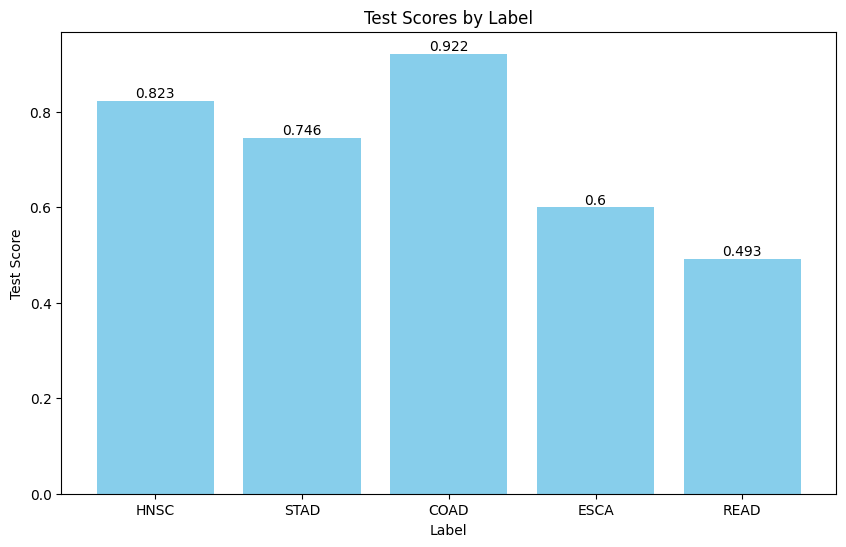

In [236]:
visualize_test_scores(exp2_pca_best_hyperparam_df)

Awesome! We have accomplished experiment 2. This is the end of the 3-part series that demonstrated the learning outcomes for this class. CONGRATS!!